# Student Performance Indicator
    Life cycle of the machine Learning Project
        1) Understanding the problem statement
        2) Data collection
        3) Data checks to perform
        4) Exploratory Data analysis
        5) Model Training
        6) Choosing the best model


# 1) Understanding the Problem statement
         This project is to understand how a students performance is graded or affected by Gender , Race ,Ethicinity , Parental Education
            lunch and Test Prep

# 2) The data is collected from kaggle  and it consists of 8 columns and 1000 rows

# 3) Package importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import OrderedDict

# read The data

In [2]:
df = pd.read_csv("Data\StudentsPerformance.csv")

# top 5 rows

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Shape of the Dataset

In [4]:
df.shape

(1000, 8)

# Data information
    

    gender : sex of students -> (Male/female)
    race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
    parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
    lunch : having lunch before test (standard or free/reduced)
    test preparation course : complete or not complete before test
    math score
    reading score
    writing score



# Data checks to perform
    
    Check Missing values
    Check Duplicates
    Check data type
    Check the number of unique values of each column
    Check statistics of data set
    Check various categories present in the different categorical column


# Check the missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

# Check for  duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate values

# Check the data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Checking the number of unique values in each column


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# check the statistics of the data
    creating a custom fucntion for the descriptive statistics

In [9]:
def custom_summary(df): #parameters?? df = dataframe original data of mtcars
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result_df = pd.DataFrame(result)
    
    skewtype =[]
    
    for i in result_df['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result_df['Skew_Type'] = skewtype
    
    k_type = []
    
    for i in result_df['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:#-.9 to .9
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: #-1,-2,-3...
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result_df['Kurtosis_Type'] = k_type
    
    
    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result_df['outlier_comment'] = outlier_comment
    
    result_df['outlier_percentage'] = outlier_percentage
   
    return result_df

In [10]:
custom_summary(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,math score,1000,0,57.00,66.089,66.0,77.0,100,229.918998,15.163080,0.274964,-0.278935,20.00,Approx Normal Distribution (-ve),Mesokurtic Curve,has outliers,0.005
1,reading score,1000,17,59.00,69.169,70.0,79.0,100,213.165605,14.600192,-0.068265,-0.259105,20.00,Approx Normal Distribution (-ve),Mesokurtic Curve,has outliers,0.005
2,writing score,1000,10,57.75,68.054,69.0,79.0,100,230.907992,15.195657,-0.033365,-0.289444,21.25,Approx Normal Distribution (-ve),Mesokurtic Curve,has outliers,0.005


1) The Data has very few outliers

2) From above description of numerical data, all means are very close to each other - between 66 and 68.05;

3) All standard deviations are also close - between 14.6 and 15.19;

4) While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17



# Exploring the data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# printing out the unique values in each of the columns

print("Categories under 'Gender' Variable:        ",end="")
print(df['gender'].unique())

print("Categories under 'Parental Level Eduation' Variable:        ",end="")
print(df['parental level of education'].unique())

print("Categories under 'race_ethnicity' Variable:        ",end="")
print(df['race/ethnicity'].unique())

print("Categories under 'lunch' Variable:        ",end="")
print(df['lunch'].unique())

print("Categories under 'test_prep_course' Variable:        ",end="")
print(df['test preparation course'].unique())


Categories under 'Gender' Variable:        ['female' 'male']
Categories under 'Parental Level Eduation' Variable:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories under 'race_ethnicity' Variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
Categories under 'lunch' Variable:        ['standard' 'free/reduced']
Categories under 'test_prep_course' Variable:        ['none' 'completed']


# defining categoricaL and Numerical Features for the dataset

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print(" We have {} numerical features namely :{}".format(len(numerical_features),numerical_features))
print(" We have {} Categorical features namely :{}".format(len(categorical_features),categorical_features))

 We have 3 numerical features namely :['math score', 'reading score', 'writing score']
 We have 5 Categorical features namely :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding extra columns for Total Score and "Average"

In [14]:
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']

df["Average"] = df["Total_Score"]/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# lets Try drawing certain information from the data we have received so far about the performance of students



In [15]:
reading_full = df[df["reading score"]== 100]['Average'].count()
writing_full = df[df["writing score"]== 100]['Average'].count()
math_full = df[df["math score"]== 100]['Average'].count()



print(f"The Number of students with full marks in maths:{math_full}")
print(f"The Number of students with full marks in Reading:{reading_full}")
print(f"The Number of studets with full marks in Writing:{writing_full}")

The Number of students with full marks in maths:7
The Number of students with full marks in Reading:17
The Number of studets with full marks in Writing:14


now lets the see the lowest performance among the students
     lets consider the passing mark is 30


In [16]:
maths_low = df[df['math score'] <= 30]['Average'].count()
reading_low = df[df['reading score']<=30]["Average"].count()
writing_low = df[df['writing score']<=30]["Average"].count()


print(f"The number of students who failed to score good in maths :{maths_low}")
print(f"The Number of students who failed to score good in reading :{reading_low}")
print(f"The number of students who failed to score good marks in writing :{writing_low}")

The number of students who failed to score good in maths :16
The Number of students who failed to score good in reading :8
The number of students who failed to score good marks in writing :10


# The conclusions drawn from the follwing details
     1) Maths have been poorly performed by the students
     2) Results are pretty much good in reading

# Now we are going to draw some Exploratory Data analysis using plots
    histogram and KDE

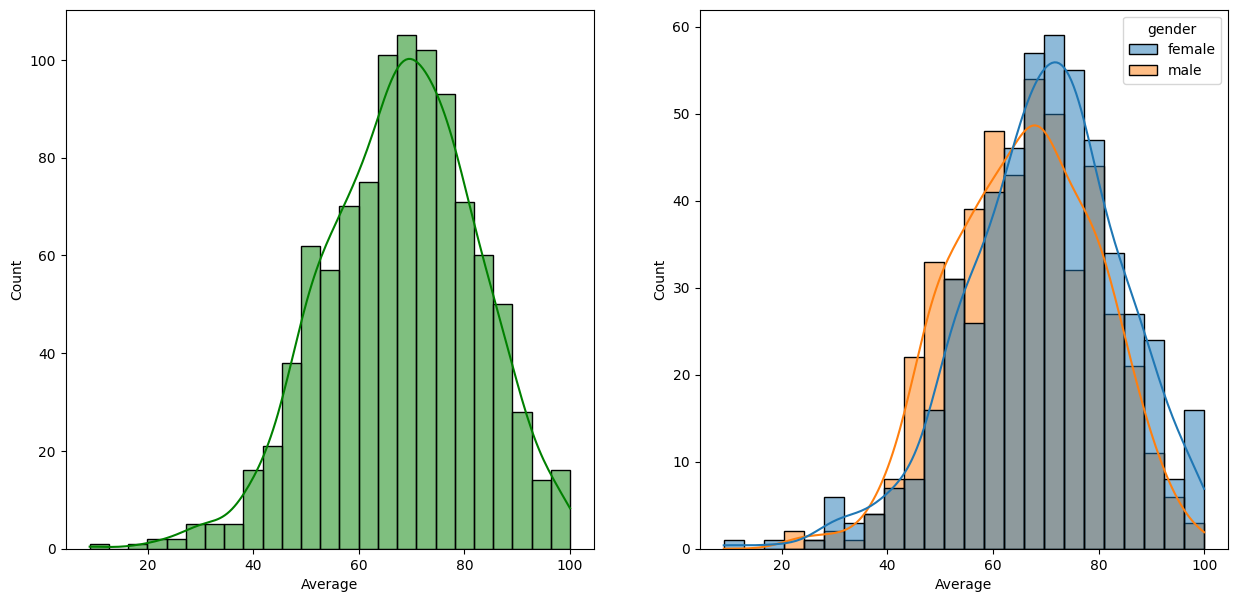

In [17]:
fig ,axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df,x='Average',bins = 25,kde=True,color='g')
plt.subplot(122)
sns.histplot(data =df,x= 'Average',kde=True,hue='gender')
plt.show()

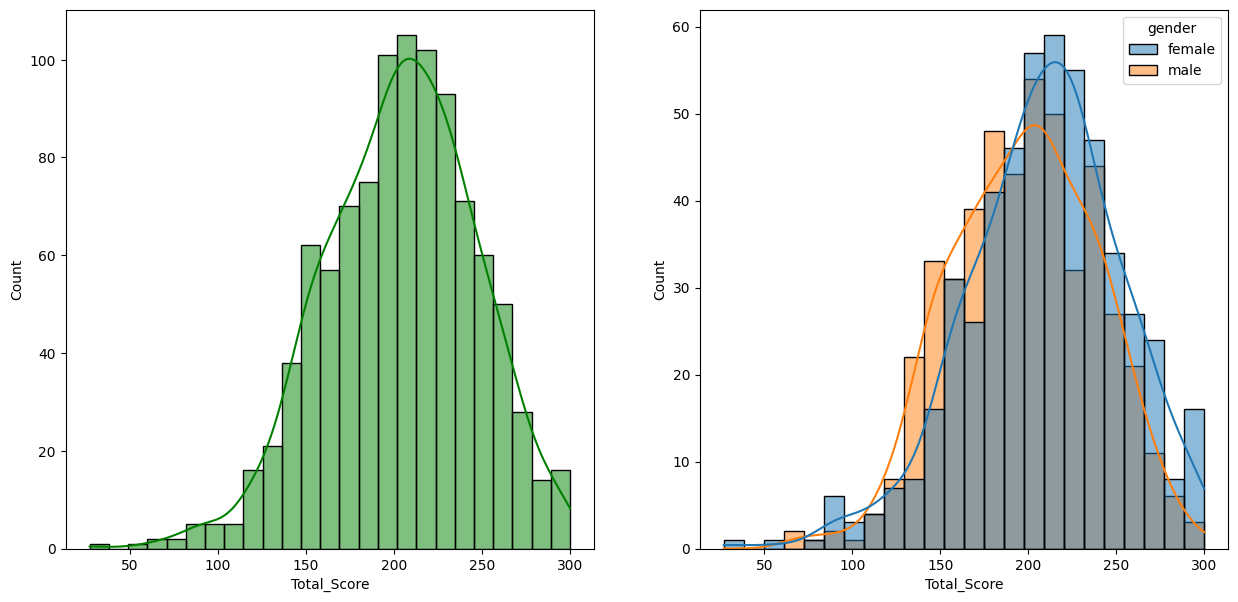

In [18]:
fig ,axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df,x='Total_Score',bins = 25,kde=True,color='g')
plt.subplot(122)
sns.histplot(data =df,x='Total_Score',kde=True,hue='gender')
plt.show()

We can conclude that female students perform better than male students

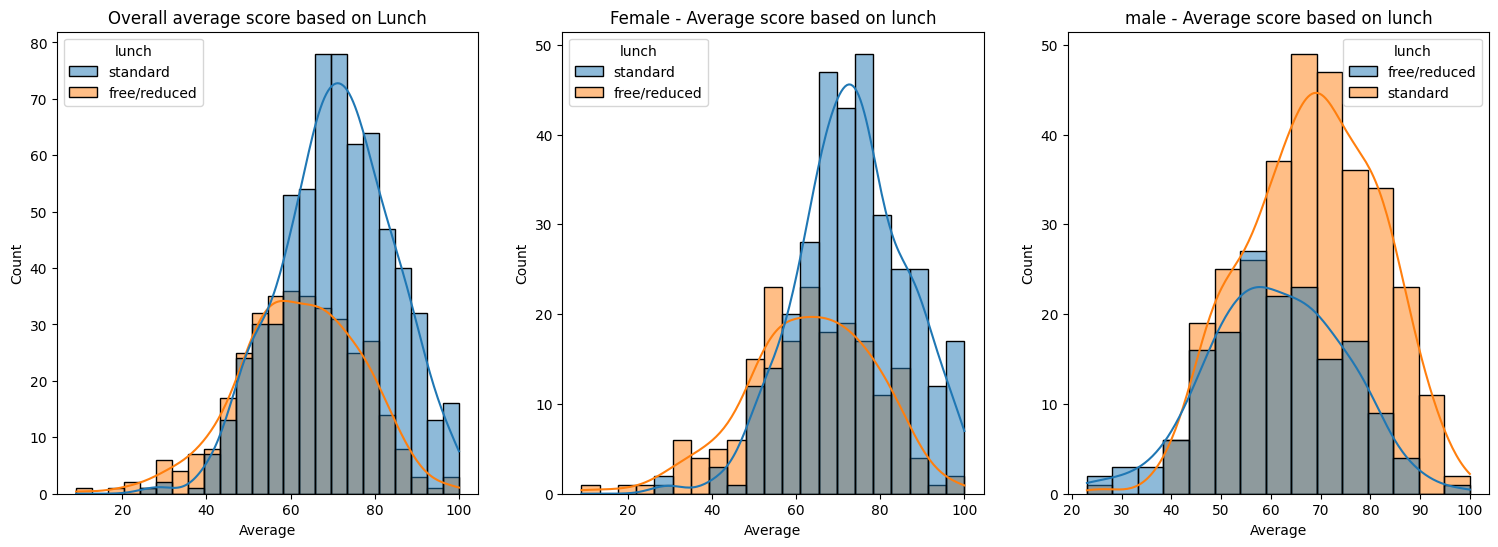

In [19]:
plt.subplots(1,3,figsize = (25,6))

plt.subplot(141)
sns.histplot(data = df , x= "Average",kde=True,hue='lunch')
plt.title("Overall average score based on Lunch")

plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x='Average',kde=True, hue='lunch')
plt.title("Female - Average score based on lunch")

plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x='Average',kde=True, hue='lunch')
plt.title("male - Average score based on lunch")

plt.show()


standard lunch helps get better results irrespective of gender

# now lets look into parents education affecting the scores of the students

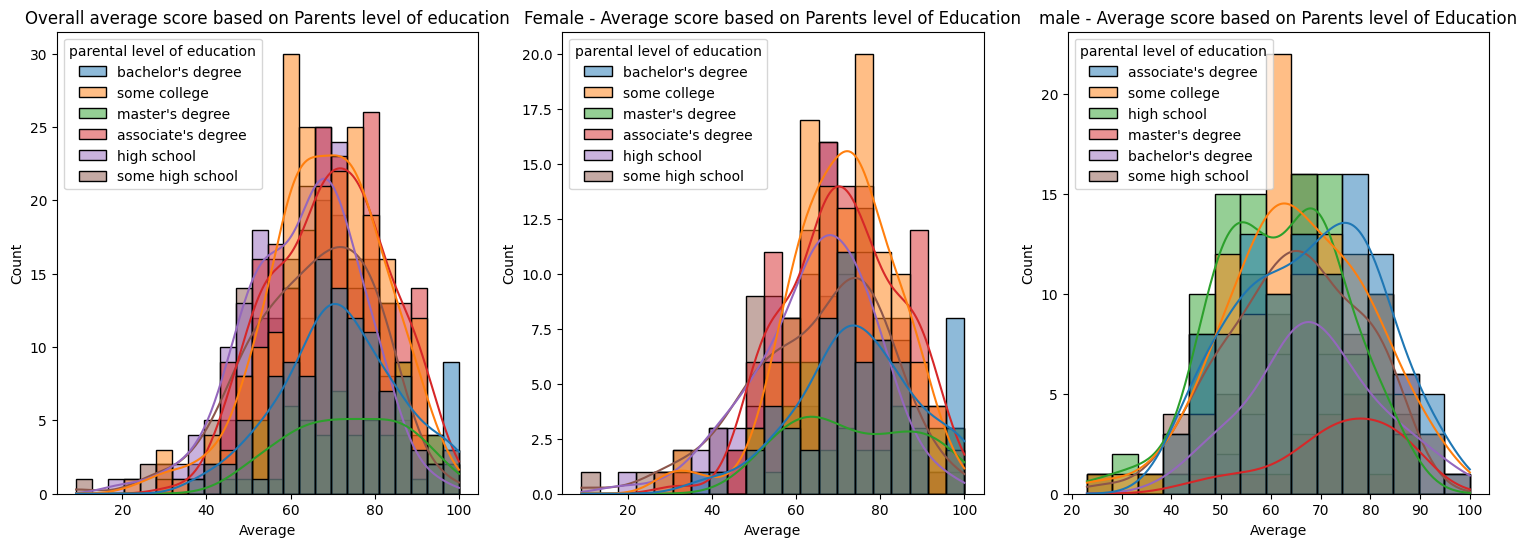

In [20]:
plt.subplots(1,3,figsize = (25,6))

plt.subplot(141)
sns.histplot(data = df , x= "Average",kde=True,hue='parental level of education')
plt.title("Overall average score based on Parents level of education")

plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x='Average',kde=True, hue='parental level of education')
plt.title("Female - Average score based on Parents level of Education")

plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x='Average',kde=True, hue='parental level of education')
plt.title("male - Average score based on Parents level of Education")

plt.show()


# findings
    graph 1 = The parents level of Education is completely irespective of their children scores
    graph2 = For Female Students it is generically the same
    graph3 = For Male students parents with Associate Degree or masters fetches better results

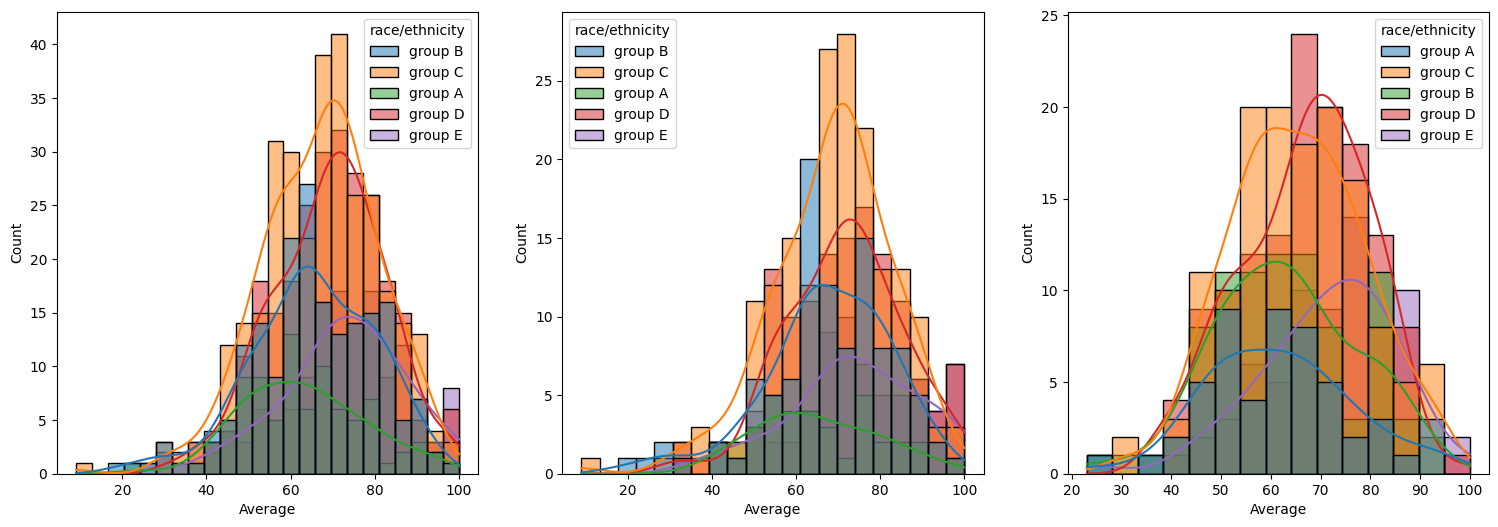

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()


Insights

    Students of group A and group B tends to perform poorly in exam.
    Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female



 
# 4.2 Maximumum score of students in all three subjects

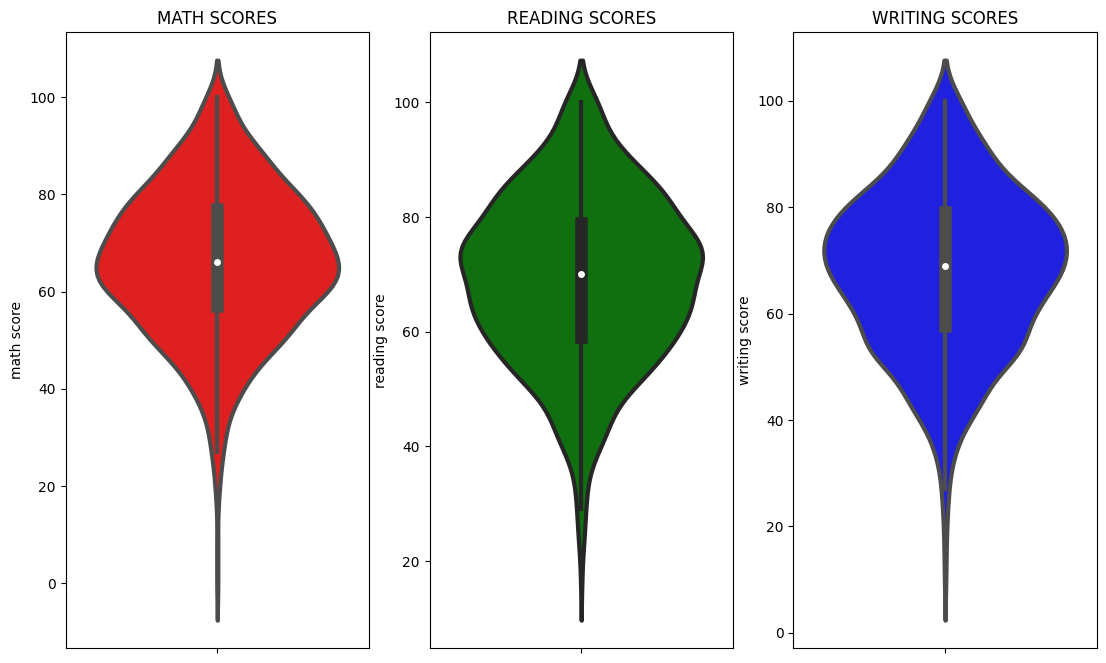

In [24]:


plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()




Insights

    From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80




# 4.3 Multivariate analysis using pieplot

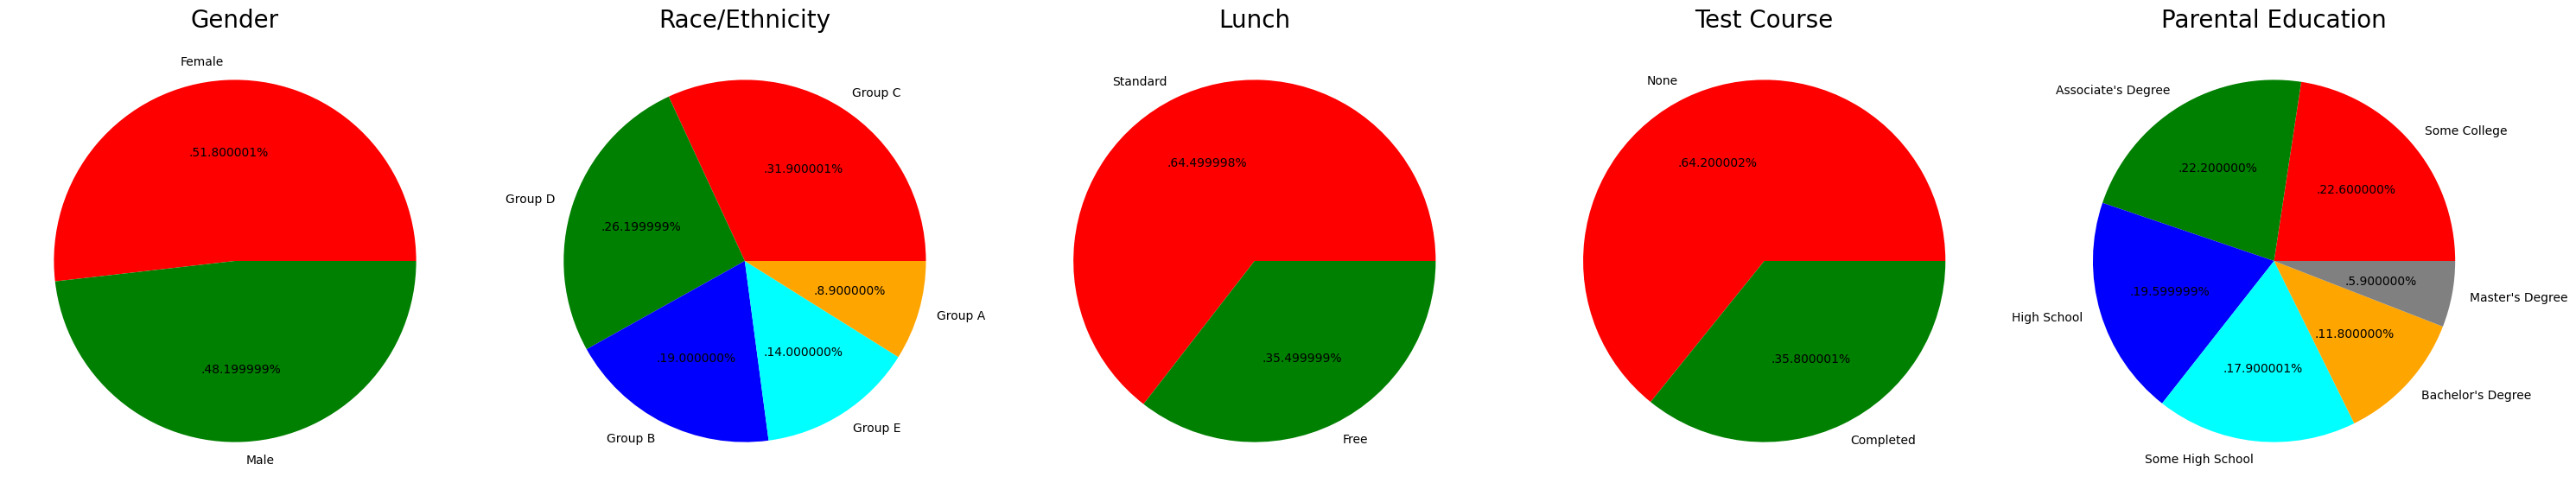

In [25]:


plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()




Insights

    Number of Male and Female students is almost equal
    Number students are greatest in Group C
    Number of students who have standard lunch are greater
    Number of students who have not enrolled in any test preparation course is greater
    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"




4.4 Feature Wise Visualization
4.4.1 GENDER COLUMN

    How is distribution of Gender ?
    Is gender has any impact on student's performance ?



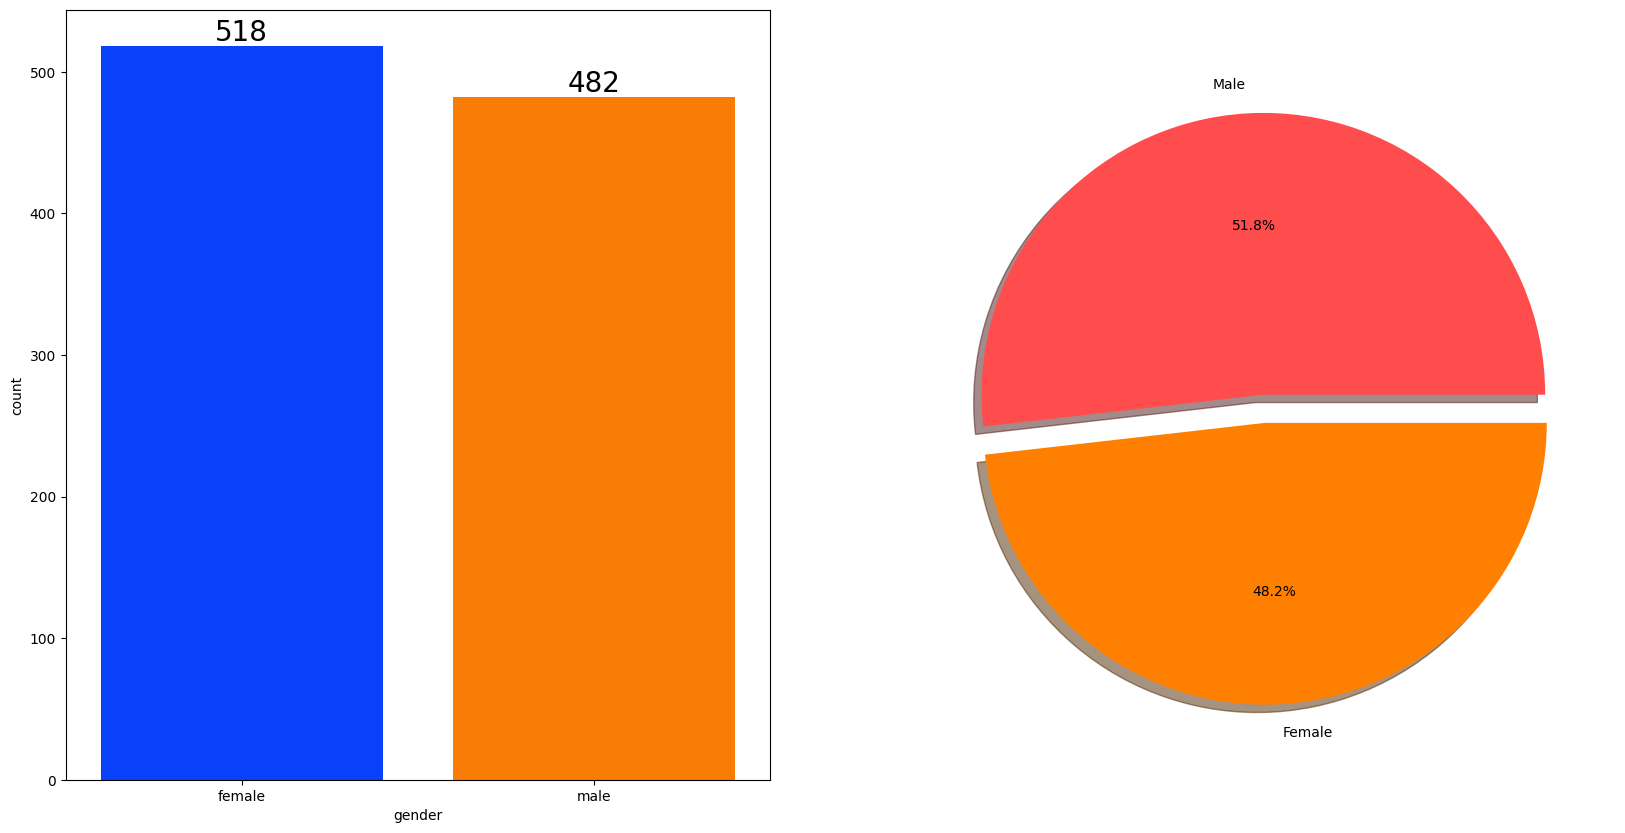

In [26]:

#UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()




Insights

    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)



# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
    
4.4.5 TEST PREPARATION COURSE COLUMN

    Which type of lunch is most common amoung students ?
    Is Test prepration course has any impact on student's performance ?



<Axes: xlabel='lunch', ylabel='writing score'>

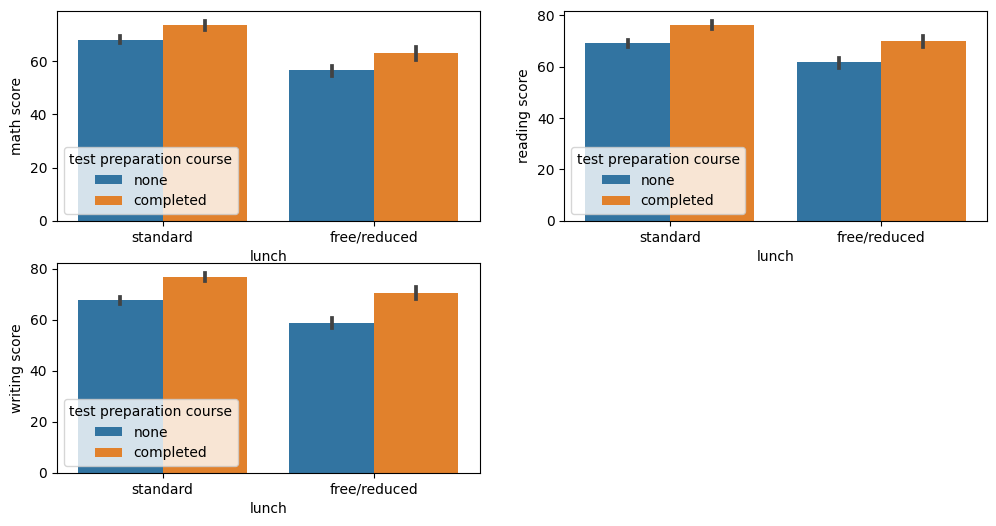

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])


Insights

    Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course



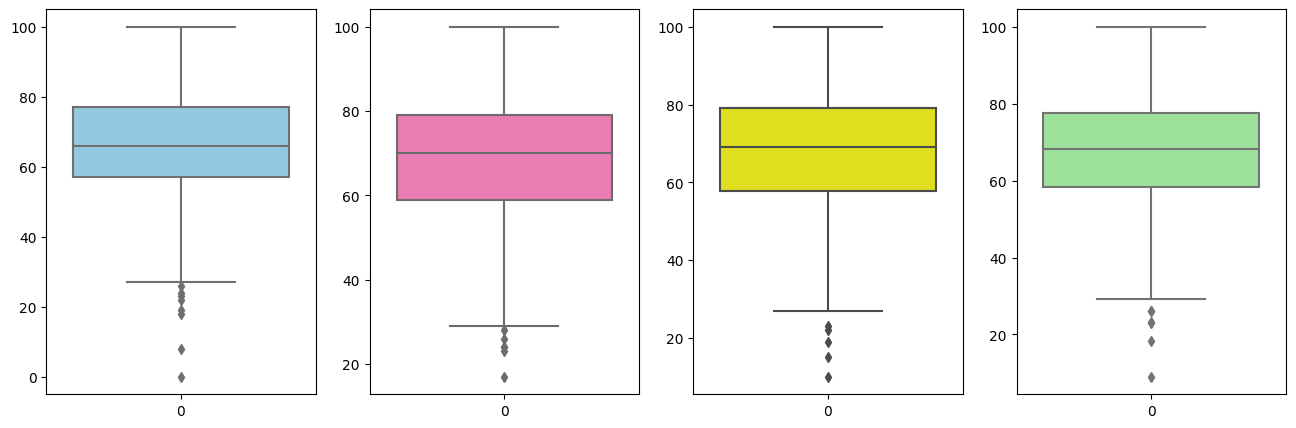

In [33]:
# checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()


# 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

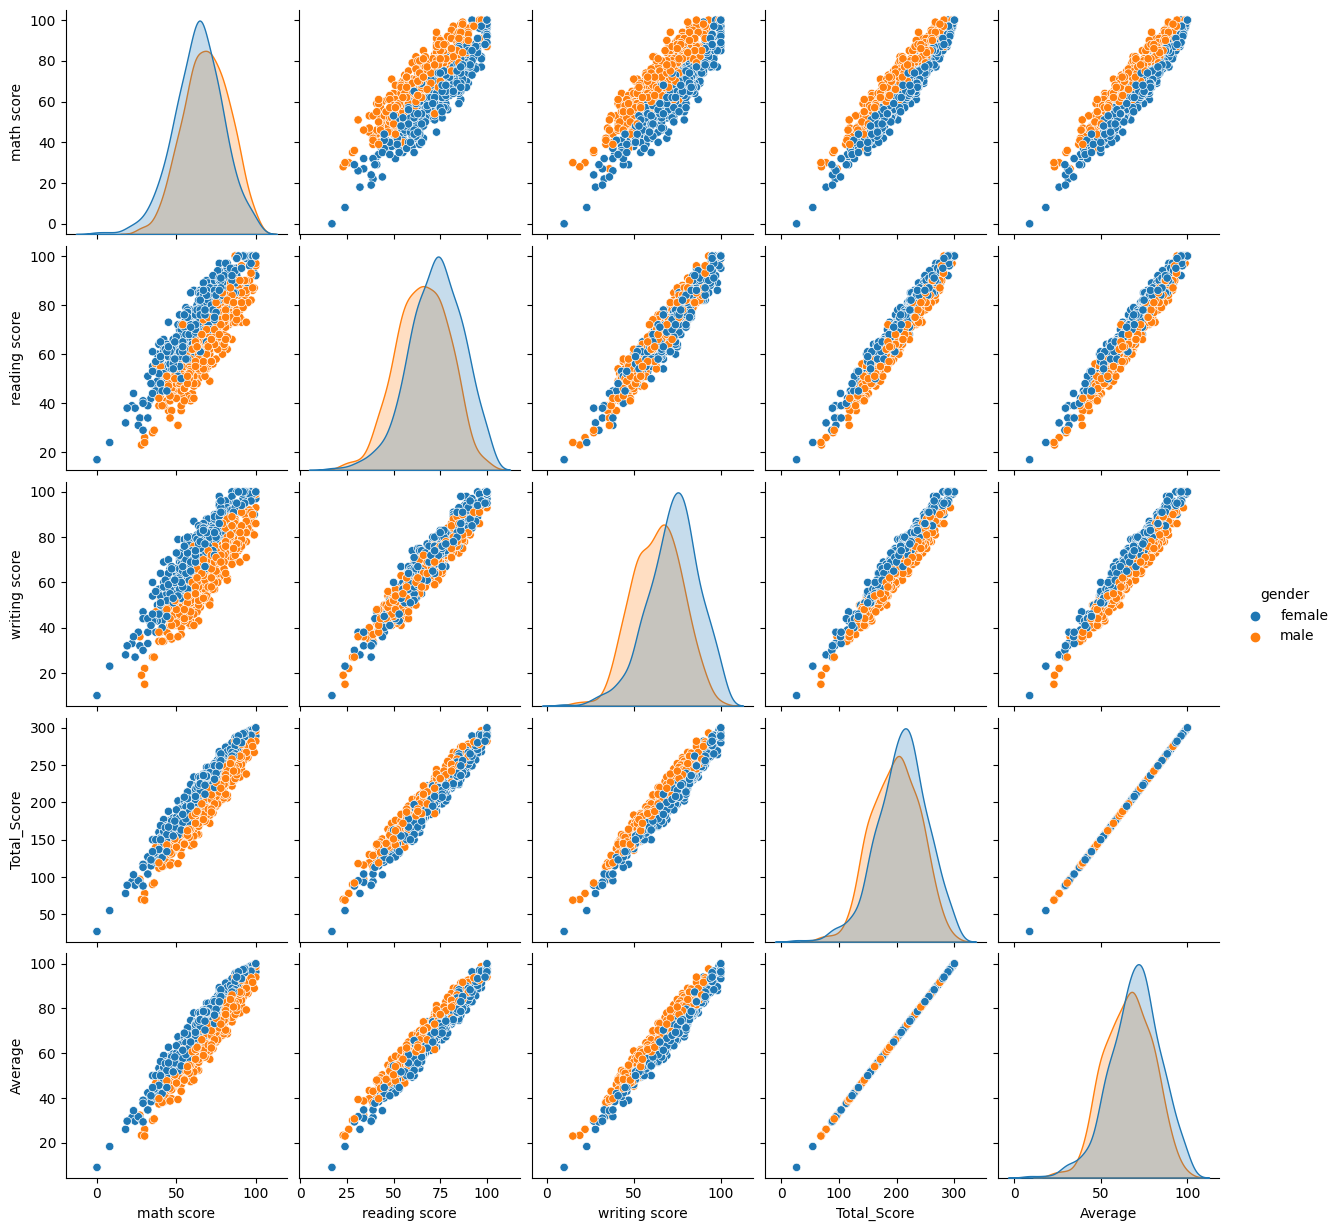

In [36]:




sns.pairplot(df,hue = 'gender')
plt.show()




Insights

    From the above plot it is clear that all the scores increase linearly with each other.



# Conclusions
 

    Student's Performance is related with lunch, race, parental level education
    Females lead in pass percentage and also are top-scorers
    Student's Performance is not much related with test preparation course
    Finishing preparation course is benefitial.

